indexes [0, 5, 8]
non_indexes [1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
correct_vals [[-5.4979014   4.1613283 ]
 [-0.58634037  4.937671  ]
 [-5.5009165   4.1089497 ]]


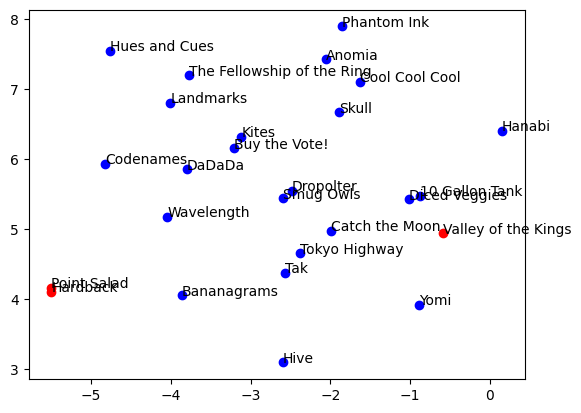

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pprint import pprint
# umap-learn
# import umap.umap_ as umap
from sklearn.manifold import TSNE
# a1 = np.asarray([(216, 236, 235, 230, 229), (237, 192, 191, 193, 199), (218, 189, 191, 192, 193), (201, 239, 230, 229, 220), (237, 210, 200, 236, 235)])
# a2 = np.asarray([(202, 202, 201, 203, 204), (210, 211, 213, 209, 208), (203, 206, 202, 201, 199), (201, 207, 206, 199, 205), (190, 191, 192, 193, 194)])

# b1 = np.asarray([(236, 237, 238, 239, 240), (215, 216, 217, 218, 219), (201, 202, 203, 209, 210), (240, 241, 243, 244, 245), (220, 221, 222, 231, 242)])
# b2 = np.asarray([(242, 243, 245, 246, 247), (248, 249, 250, 251, 252), (210, 203, 209, 210, 211), (247, 248, 249, 250, 251), (230, 231, 235, 236, 240)])

# X = np.vstack([a1.T, a2.T, b1.T, b2.T])
# pprint(X)

X = np.asarray([
(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0),
(0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1),
(0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0),
(1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0),
(0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0),
(0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0),
(0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0),
(0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0),
(0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1),
(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0),
(0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0),
(0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0),

])

row_sums = X.sum(axis=1)
new_X = X / row_sums[:, np.newaxis]

titles = [
    "Point Salad",
    "Wavelength",
    "Anomia",
    "Cool Cool Cool",
    "Tak",
    "Valley of the Kings",
    "Landmarks",
    "Skull",
    "Hardback",
    "Buy the Vote!",
    "Hanabi",
    "DaDaDa",
    "10 Gallon Tank",
    "Smug Owls",
    "Dropolter",
    "Phantom Ink",
    "Codenames",
    "Hive",
    "Yomi",
    "Tokyo Highway",
    "Catch the Moon",
    "The Fellowship of the Ring",
    "Hues and Cues",
    "Kites",
    "Bananagrams",
    "Diced Veggies",
]

mechanics = [
    "Deck, Bag, and Pool Building",
    "I Cut, You Choose",
    "Hand Management",
    "Memory",
    "Score-and-Reset Game",
    "Word Game",
    "Team-Based Game",
    "Hexagon Grid",
    "Tile Placement",
    "Enclosure",
    "Deduction",
    "Dice Rolling",
    "Real-Time",
    "Action / Dexterity",
    "Puzzle",
    "Three Dimensional Movement",
    "Rock-Paper-Scissors",
    "Trick-taking",
    "Simultaneous Action Selection",
    "Real-time",
    "Push Your Luck",
    "Grid Movement",
    "Delayed Purchase",
    "Set Collection",
    "Party Game",
    "Semi-Cooperative Game",
    "Pieces as Map",
    "Variable Player Powers",
    "Card Game",
    "Tableau Splitting",
    "Cooperative Game",
    "Ordering",
    "Scenario / Mission / Campaign Game",
    "Spelling",
    "Pattern Movement",
    "Communication Limits",
    "Acting",
    "Network and Route Building",
    "Stacking and Balancing",
    "Race",
    "Turn Order: Progressive",
    "Player Judge",
    "Targeted Clues",
]

# pprint(X)

# y = [1]*5 + [2]*5 + [3]*5 + [4]*5
# clf = LinearDiscriminantAnalysis(n_components=2)

# reducer = umap.UMAP()



# Xmem = reducer.fit_transform(X)
# print(Xem.shape)

# pprint(X)
# pprint(y)
# clf.fit(X, y)

# Xem = clf.transform(X)

# pprint(Xem)
new_X = TSNE(n_components=2, perplexity=15,random_state=0).fit_transform(X)
fig, ax = plt.subplots()

target_mechanic = "Deck, Bag, and Pool Building"
indexes = [i for i in range(len(X)) if X[i][mechanics.index(target_mechanic)] == 1]
print('indexes', indexes)
non_indexes = [i for i in range(len(X)) if i not in indexes]
print('non_indexes', non_indexes)
correct_vals = new_X[indexes, :]
incorrect_vals = new_X[non_indexes, :]
print('correct_vals', correct_vals)
ax.scatter(correct_vals[:, 0], correct_vals[:, 1], c='r', marker='o')
ax.scatter(incorrect_vals[:, 0], incorrect_vals[:, 1], c='b', marker='o')
# ax.scatter(new_X[:, 0], new_X[:, 1], c='b', marker='o')
# ax.scatter(new_X[:, 0], new_X[:, 1], c='b', marker='o')

for ind, val in enumerate(new_X):
    ax.annotate(titles[ind], (val[0], val[1]))